This notebook produces figures of realized vol for the 5 bond etfs after each of the FOMC minutes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style("ticks", {"axes.grid": True, "grid.color": "0.95", "grid.linestyle": "-"})

# Import Data

In [3]:
ticker_df = pd.read_csv('../data/clean/ticker.csv')
ticker_5s_df = pd.read_csv('../data/clean/ticker_5s.csv')
ticker_1s_df = pd.read_csv('../data/clean/ticker_1s.csv')

# Prep Data

In [4]:
# I will use 5s bars from the August minutes for the rest of this notebook
ticker_resample_df = ticker_5s_df.copy()

In [5]:
# Fix datetime column and sort data
ticker_resample_df['datetime'] = pd.to_datetime(ticker_resample_df['datetime'])
ticker_resample_df = ticker_resample_df.sort_values(by = ['ticker', 'date', 'datetime'])

## RV

In [6]:
# Set realized volatility 
ticker_resample_df['realized_vol'] = ticker_resample_df['two_scale_realized_vol_100']

In [7]:
ticker_resample_df.sample(5)

,ticker,ticker_desc,ticker_desc_short,date,datetime,price,log_price,return,return_5s,return_60s,rv_sub,two_scale_realized_var,sigma_2_hat,two_scale_realized_var_biased,two_scale_realized_vol,two_scale_realized_vol_100,realized_vol
63086,SHY,iShares 1-3 Year Treasury Bond ETF,1-3 Year,2020-02-19,2020-02-19 12:37:10,84.91,4.441592,0.0,0.0,0.000000,1.387002e-10,9.917067e-09,0.000000e+00,1.271419e-10,0.000100,0.009958,0.009958
71869,SHY,iShares 1-3 Year Treasury Bond ETF,1-3 Year,2020-05-20,2020-05-20 11:49:05,86.63,4.461646,0.0,0.0,-0.000115,6.661288e-09,3.896803e-07,1.665386e-10,6.661288e-09,0.000624,0.062424,0.062424
62411,SHY,iShares 1-3 Year Treasury Bond ETF,1-3 Year,2020-02-19,2020-02-19 11:40:55,84.91,4.441592,0.0,0.0,0.000000,6.935502e-09,3.606461e-07,2.889792e-11,4.912647e-09,0.000601,0.060054,0.060054
38998,IEI,iShares 3-7 Year Treasury Bond ETF,3-7 Year,2020-04-08,2020-04-08 11:39:50,132.76,4.888543,0.0,0.0,0.000000,8.511067e-09,6.730917e-07,7.092556e-11,9.338636e-09,0.000820,0.082042,0.082042
133269,TLT,iShares 20+ Year Treasury Bond ETF,20+ Year,2020-07-01,2020-07-01 12:36:05,163.05,5.094057,0.0,0.0,-0.000123,4.699073e-07,3.375117e-05,2.340645e-09,4.561138e-07,0.005810,0.580958,0.580958


# Figures

In [8]:
# Figure parameters
figsize_fomcplots = (14,9)

## Replication Check

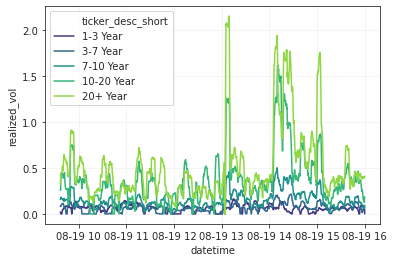

In [9]:
# Plot price index
sns.lineplot(
    x="datetime",
    y="realized_vol",
    hue="ticker_desc_short",
    hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
    palette=sns.color_palette("viridis", 5),
    data=ticker_resample_df.query('date == "2020-08-19"'),
    **{"lw": 1.5}
)

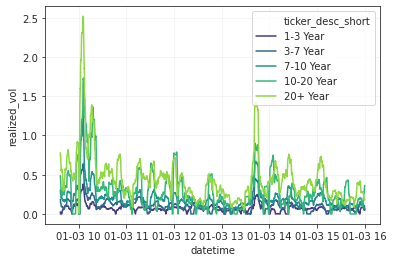

In [10]:
# Plot price index
sns.lineplot(
    x="datetime",
    y="realized_vol",
    hue="ticker_desc_short",
    hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
    palette=sns.color_palette("viridis", 5),
    data=ticker_resample_df.query('date == "2020-01-03"'),
    **{"lw": 1.5}
)

## RV

### Aug 19 FOMC Minute Release

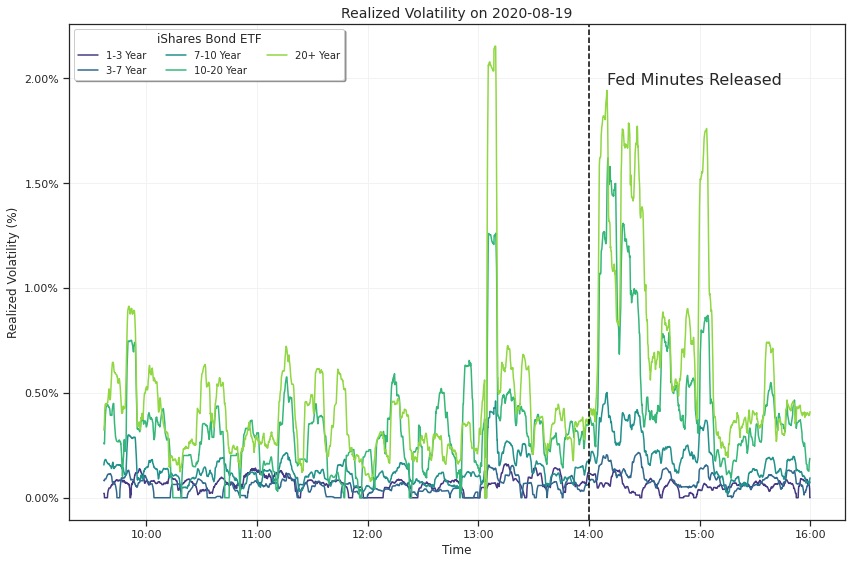

In [66]:
fomc_dates = np.sort(ticker_resample_df["date"].unique())[-1:]
fig, ax = plt.subplots(figsize=(12,8), nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot
    sns.lineplot(
        x="datetime",
        y="realized_vol",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=ticker_resample_df.query("date == @fomc_date"),
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Realized Volatility on {fomc_date}", fontsize=14)
    plt.ylabel("Realized Volatility (%)")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            2,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="upper left",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            ncol=3,
            shadow=True,
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_rv_aug19.pdf")

### Every FOMC Minute Release

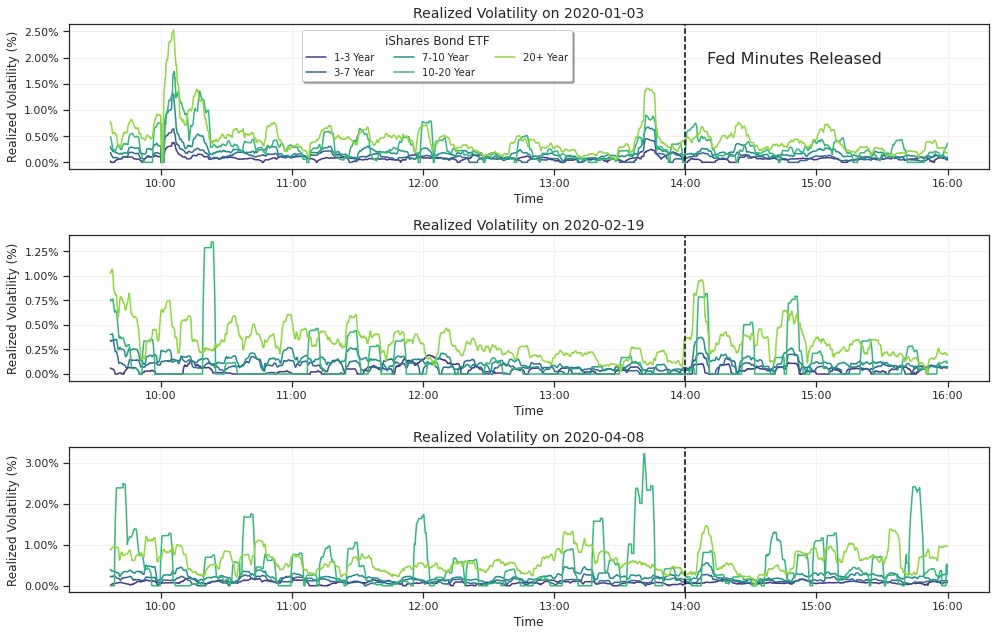

In [11]:
fomc_dates = np.sort(ticker_resample_df["date"].unique())[:3]
fig, ax = plt.subplots(figsize=figsize_fomcplots, nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot
    sns.lineplot(
        x="datetime",
        y="realized_vol",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=ticker_resample_df.query("date == @fomc_date"),
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Realized Volatility on {fomc_date}", fontsize=14)
    plt.ylabel("Realized Volatility (%)")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            2,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="center",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            bbox_to_anchor=(0.4, 0.78),
            ncol=3,
            shadow=True,
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_rv_01to04.pdf")

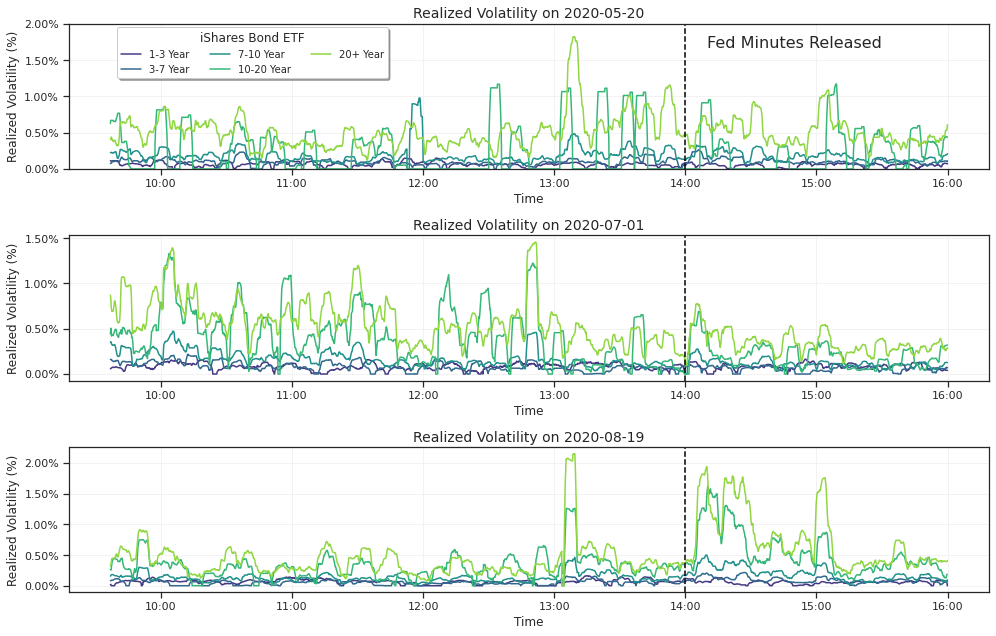

In [24]:
fomc_dates = np.sort(ticker_resample_df["date"].unique())[3:]
fig, ax = plt.subplots(figsize=figsize_fomcplots, nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot
    sns.lineplot(
        x="datetime",
        y="realized_vol",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=ticker_resample_df.query("date == @fomc_date"),
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Realized Volatility on {fomc_date}", fontsize=14)
    plt.ylabel("Realized Volatility (%)")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            1.75,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )
        plt.ylim(0,2)

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="center",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            bbox_to_anchor=(0.2, 0.8),
            ncol=3,
            shadow=True,
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_rv_05to08.pdf")

## Price Index

### Sampling Frequency

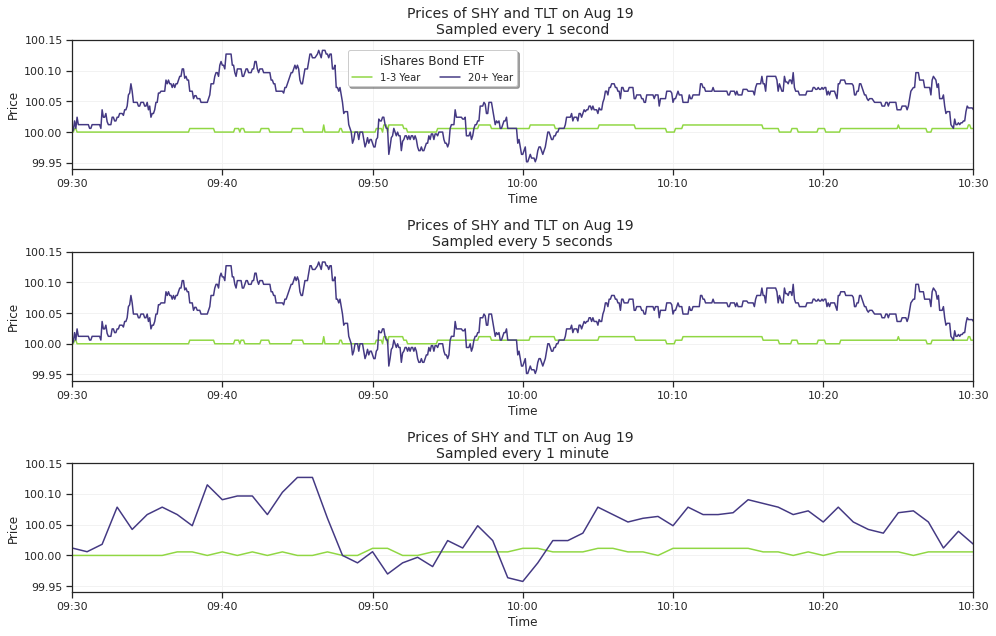

In [45]:
price_series = ["priceidx_1s", "priceidx_5s", "priceidx_1min"]
price_series_names = ["1 second", "5 seconds", "1 minute", "5 minutes"]
price_series_freq = ["1s", "5s", "1min"]
fig, ax = plt.subplots(figsize=(14, 9), nrows=len(price_series), ncols=1)
sns.set_context("notebook", font_scale=1)

# Add price indexed from 100
plot_data = ticker_resample_df.query("date == '2020-08-19'").copy()
first_price_dict = plot_data.groupby("ticker")["price"].first().to_dict()
plot_data["price_indexed"] = plot_data.groupby("ticker")["price"].apply(
    lambda x: 100 * x / first_price_dict.get(x.name)
)

plot_data["priceidx_1s"] = plot_data.groupby(["ticker", "date", pd.Grouper(key="datetime", freq="1s")])[
    "price_indexed"
].transform("last")
plot_data["priceidx_5s"] = plot_data.groupby(["ticker", "date", pd.Grouper(key="datetime", freq="5s")])[
    "price_indexed"
].transform("last")
plot_data["priceidx_1min"] = plot_data.groupby(
    ["ticker", "date", pd.Grouper(key="datetime", freq="1min")]
)["price_indexed"].transform("last")
plot_data["priceidx_5min"] = plot_data.groupby(
    ["ticker", "date", pd.Grouper(key="datetime", freq="5min")]
)["price_indexed"].transform("last")

for i in tqdm(range(len(price_series))):

    ps = price_series[i]
    ax = plt.subplot(len(price_series), 1, i + 1)

    # Plot
    sns.lineplot(
        x="datetime",
        y=ps,
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5)[0:5:4][::-1],
        data=plot_data.query('ticker == ["SHY", "TLT"]')
        .groupby(
            [
                "ticker",
                "ticker_desc_short",
                "date",
                pd.Grouper(key="datetime", freq=price_series_freq[i]),
            ]
        )[ps]
        .last().reset_index(),
        ax=ax,
        **{"lw": 1.5},
    )
    #     # Vline at 2PM
    #     ax.axvline(
    #         x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    #     )

    #     # Plot settings
    plt.title(f"Prices of SHY and TLT on Aug 19 \nSampled every {price_series_names[i]}", fontsize=14)
    plt.ylabel("Price")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    plt.xlim(pd.to_datetime("2020-08-19 09:30:00"), pd.to_datetime("2020-08-19 10:30:00"))
    plt.ylim(99.94, 100.15)
    #     ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

    # Only for the first plot
    if i == 0:
        #         # Text
        #         plt.text(
        #             pd.to_datetime(f"{fomc_date} 14:10:00"),
        #             2,
        #             "Fed Minutes Released",
        #             size=16,
        #             ha="left",
        #             va="center_baseline",
        #         )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="center",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            bbox_to_anchor=(0.4, 0.78),
            ncol=3,
            shadow=True,
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_priceidx_sampling.pdf")

### Aug 19 FOMC Minute Release

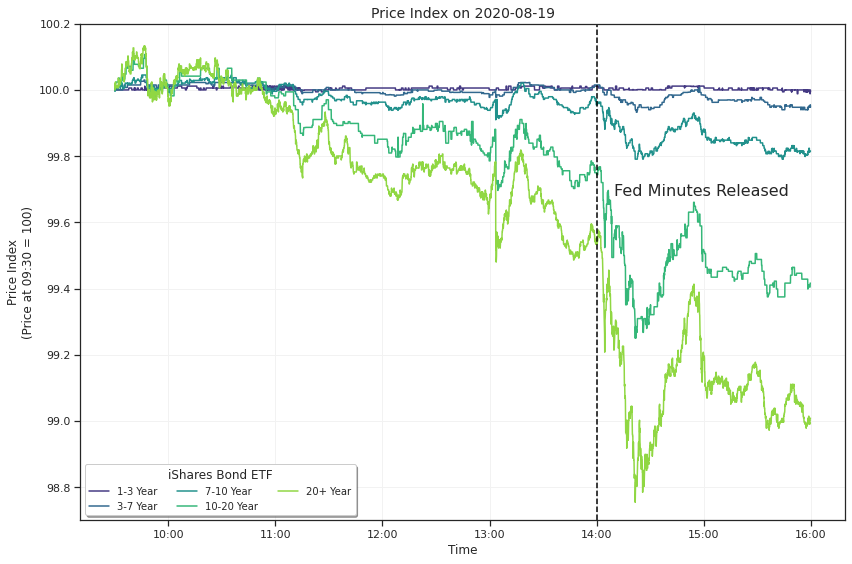

In [60]:
# Just first day
fomc_dates = np.sort(ticker_resample_df["date"].unique())[-1:]
fig, ax = plt.subplots(figsize=(12, 8), nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot data
    plot_data = ticker_resample_df.query("date == @fomc_date").copy()
    # Add price indexed from 100
    first_price_dict = plot_data.groupby("ticker")["price"].first().to_dict()
    plot_data["price_indexed"] = plot_data.groupby("ticker")["price"].apply(
        lambda x: 100 * x / first_price_dict.get(x.name)
    )

    # Plot price index
    sns.lineplot(
        x="datetime",
        y="price_indexed",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=plot_data,
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Price Index on {fomc_date}", fontsize=14)
    plt.ylabel("Price Index\n(Price at 09:30 = 100)")
    plt.xlabel("Time")
    plt.ylim(98.7, 100.2)
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            99.7,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="lower left",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            ncol=3,
            shadow = True
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_priceindex_aug19.pdf")

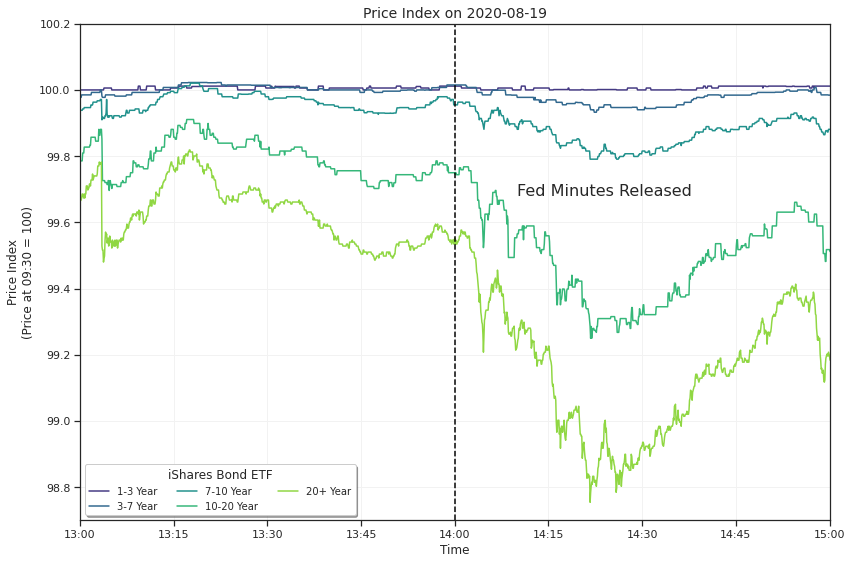

In [69]:
# Just first day
fomc_dates = np.sort(ticker_resample_df["date"].unique())[-1:]
fig, ax = plt.subplots(figsize=(12, 8), nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot data
    plot_data = ticker_resample_df.query("date == @fomc_date").copy()
    # Add price indexed from 100
    first_price_dict = plot_data.groupby("ticker")["price"].first().to_dict()
    plot_data["price_indexed"] = plot_data.groupby("ticker")["price"].apply(
        lambda x: 100 * x / first_price_dict.get(x.name)
    )

    # Plot price index
    sns.lineplot(
        x="datetime",
        y="price_indexed",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=plot_data,
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Price Index on {fomc_date}", fontsize=14)
    plt.ylabel("Price Index\n(Price at 09:30 = 100)")
    plt.xlabel("Time")
    plt.ylim(98.7, 100.2)
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
    plt.xlim(pd.to_datetime('2020-08-19 13:00:00'), pd.to_datetime('2020-08-19 15:00:00'))
    
    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            99.7,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="lower left",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            ncol=3,
            shadow = True
        )

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_priceindex_zoom_aug19.pdf")

### Every FOMC Minute Release

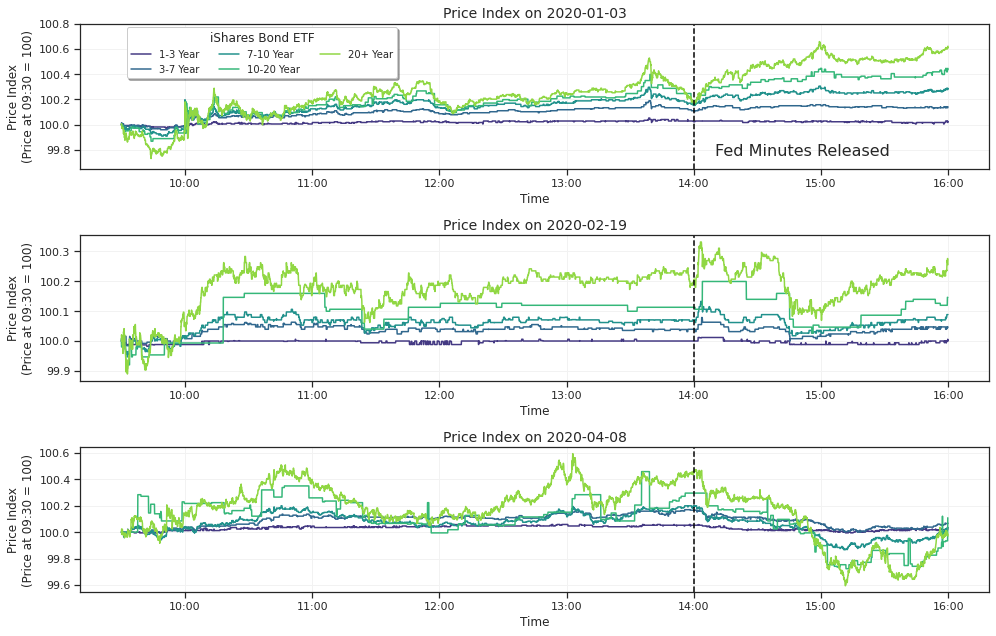

In [12]:
fomc_dates = np.sort(ticker_resample_df["date"].unique())[:3]
fig, ax = plt.subplots(figsize=figsize_fomcplots, nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot data
    plot_data = ticker_resample_df.query("date == @fomc_date").copy()
    # Add price indexed from 100
    first_price_dict = plot_data.groupby("ticker")["price"].first().to_dict()
    plot_data["price_indexed"] = plot_data.groupby("ticker")["price"].apply(
        lambda x: 100 * x / first_price_dict.get(x.name)
    )

    # Plot price index
    sns.lineplot(
        x="datetime",
        y="price_indexed",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=plot_data,
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Price Index on {fomc_date}", fontsize=14)
    plt.ylabel("Price Index\n(Price at 09:30 = 100)")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            99.8,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="center",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            bbox_to_anchor=(0.2, 0.8),
            ncol=3,
            shadow = True
        )
        plt.ylim(99.65, 100.8)

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_priceindex_01to04.pdf")

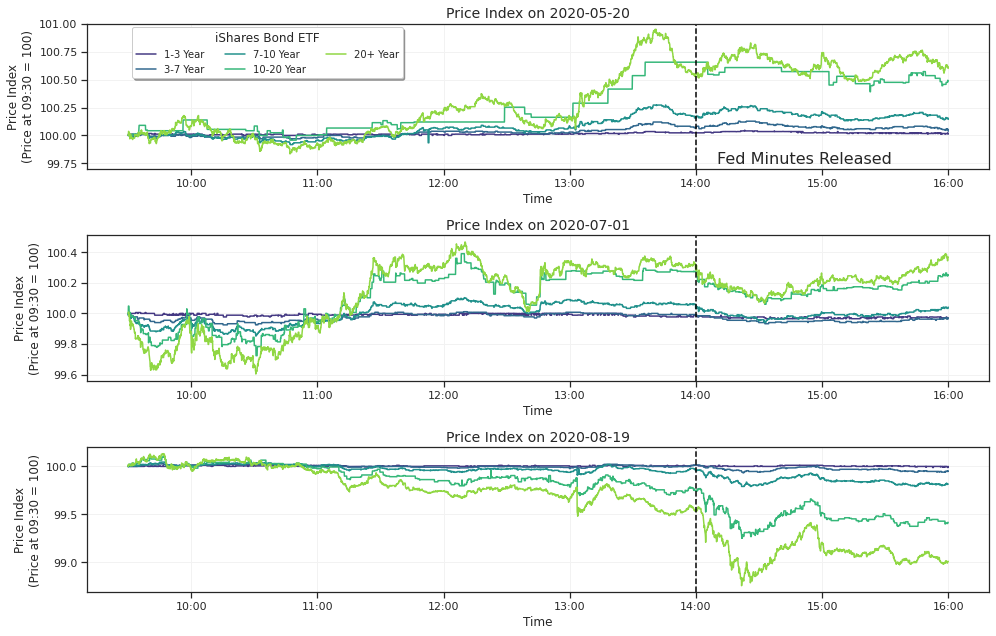

In [13]:
fomc_dates = np.sort(ticker_resample_df["date"].unique())[3:]
fig, ax = plt.subplots(figsize=figsize_fomcplots, nrows=len(fomc_dates), ncols=1)
sns.set_context("notebook", font_scale=1)

for i in tqdm(range(len(fomc_dates))):

    fomc_date = fomc_dates[i]
    ax = plt.subplot(len(fomc_dates), 1, i + 1)

    # Plot data
    plot_data = ticker_resample_df.query("date == @fomc_date").copy()
    # Add price indexed from 100
    first_price_dict = plot_data.groupby("ticker")["price"].first().to_dict()
    plot_data["price_indexed"] = plot_data.groupby("ticker")["price"].apply(
        lambda x: 100 * x / first_price_dict.get(x.name)
    )

    # Plot price index
    sns.lineplot(
        x="datetime",
        y="price_indexed",
        hue="ticker_desc_short",
        hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
        palette=sns.color_palette("viridis", 5),
        data=plot_data,
        ax=ax,
        **{"lw": 1.5},
    )
    # Vline at 2PM
    ax.axvline(
        x=pd.to_datetime(f"{fomc_date} 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
    )

    # Plot settings
    plt.title(f"Price Index on {fomc_date}", fontsize=14)
    plt.ylabel("Price Index\n(Price at 09:30 = 100)")
    plt.xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

    # Only for the first plot
    if i == 0:
        # Text
        plt.text(
            pd.to_datetime(f"{fomc_date} 14:10:00"),
            99.8,
            "Fed Minutes Released",
            size=16,
            ha="left",
            va="center_baseline",
        )

        # Fix legend
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(
            loc="center",
            handles=handles[1:],
            labels=labels[1:],
            title="iShares Bond ETF",
            fontsize=10,
            bbox_to_anchor=(0.2, 0.8),
            ncol=3,
            shadow = True
        )
        plt.ylim(99.7, 101)

    else:
        ax.get_legend().remove()

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_priceindex_05to08.pdf")